<a id="1"></a>
# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px

<a id="2"></a>
# Loading Dataset

In [2]:
df=pd.read_csv("../input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


<a id="3"></a>
# Exploratory Some Information About Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


# Here is the row count and type of each column

In [4]:
df.shape

(4340, 8)

# This code gives us the column and row information of the dataset.

In [5]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


# This code shows us some values ​​of numerical values ​​such as mean, standard deviation, minimum, maximum.

In [6]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

# This code gives us the number of null values ​​in the dataset.

In [7]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

# This code gives us the names of the columns.

In [8]:
df["name_2"] = df.name.apply(lambda x : ' '.join(x.split(' ')[:1]))
df['name_2']

0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: name_2, Length: 4340, dtype: object

# This line of code is the separation process to identify the make of the car models in the column named "name".
# The column named "name" is then saved as a new variable "name_2".

# Data Visualization

In [9]:
df.name_2.value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: name_2, dtype: int64

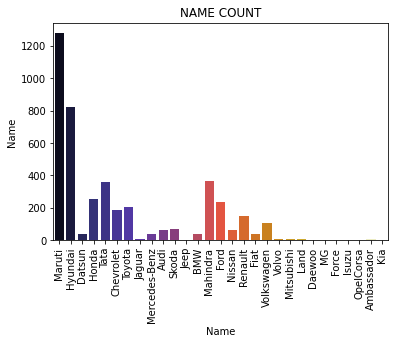

In [10]:
sns.countplot(data=df,x="name_2",palette="CMRmap")
plt.xticks(rotation=90)
plt.xlabel("Name",fontsize=10,color="black")
plt.ylabel("Name",fontsize=10,color="black")
plt.title("NAME COUNT",color="black")
plt.show()

# The most common car model is the Maruti.
    
# INFORMATION: Maruti Suzuki India Limited, formerly known as Maruti Udyog Limited, is an Indian automobile manufacturer, based in New Delhi.

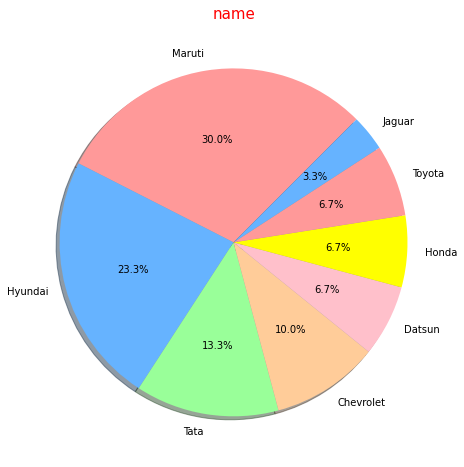

In [11]:
labels = df["name_2"][:30].value_counts().index
sizes = df["name_2"][:30].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)
plt.title('name',color = 'red',fontsize = 15)
plt.show()

# The most common car model is the Maruti. It is shown with pie table in this table.

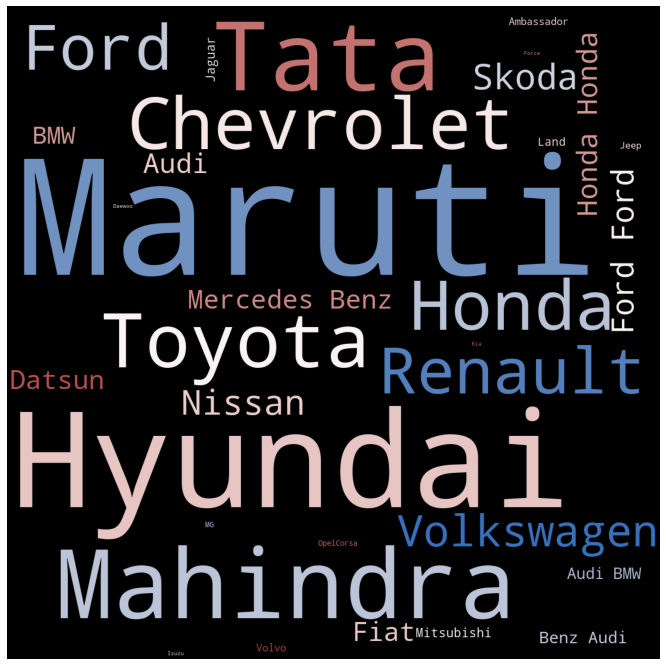

In [12]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df['name_2'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
plt.show()

# Again, the most common type of car was the Maruti, followed by Hyundai. This is illustrated with a word cloud graphic.

In [13]:
df.year.value_counts()

2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

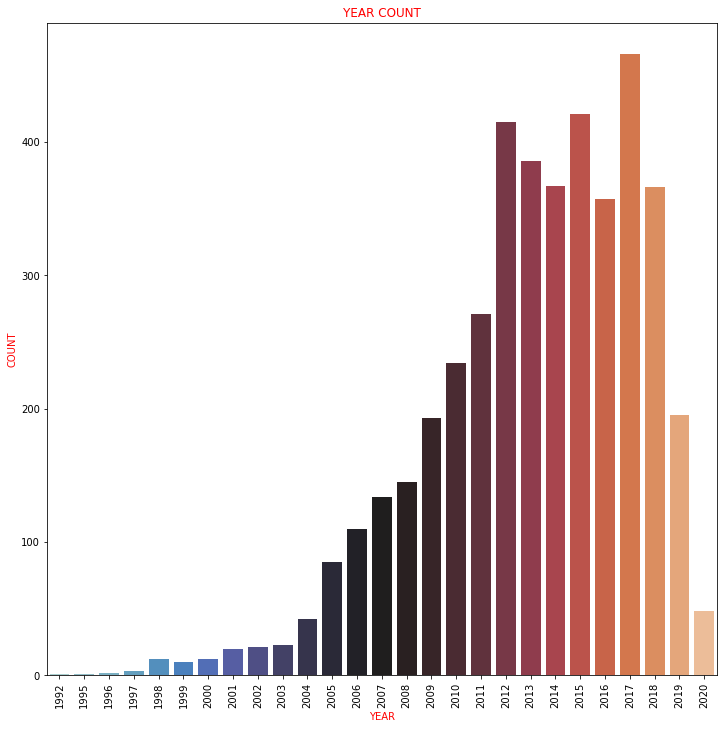

In [14]:
sns.countplot(data=df,x="year",palette="icefire")
plt.xticks(rotation=90)
plt.xlabel("YEAR",fontsize=10,color="RED")
plt.ylabel("COUNT",fontsize=10,color="RED")
plt.title("YEAR COUNT",color="RED")
plt.show()

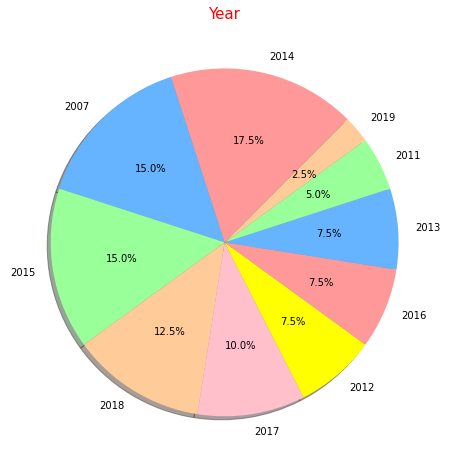

In [15]:
labels = df["year"][:40].value_counts().index
sizes = df["year"][:40].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)
plt.title('Year',color = 'red',fontsize = 15)
plt.show()

In [16]:
df.fuel.value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

# In this table, it is seen that the most common type of fuel is diesel, followed by petroleum.

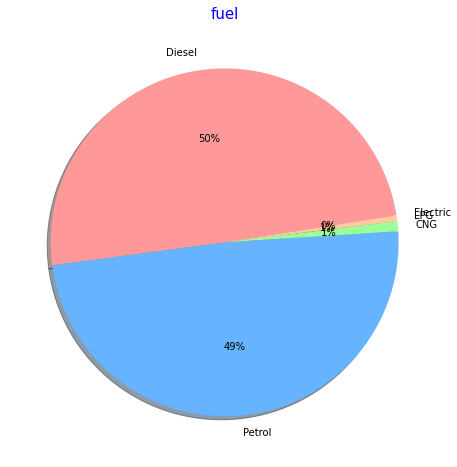

In [17]:
labels = df["fuel"].value_counts().index
sizes = df["fuel"].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.f%%',colors=colors,shadow=True, startangle=9)
plt.title('fuel',color = 'blue',fontsize = 15)
plt.show()

In [18]:
df.seller_type.value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

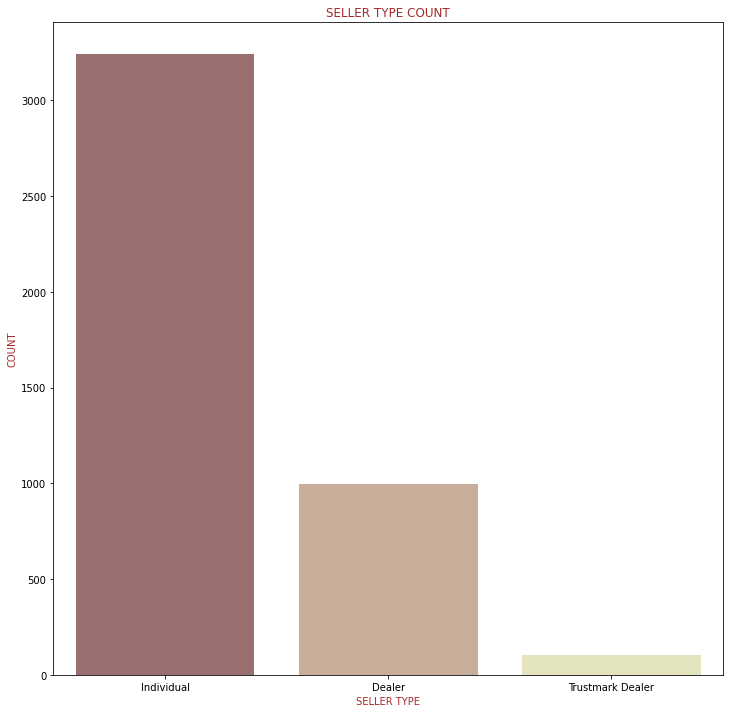

In [19]:
sns.countplot(data=df,x="seller_type",palette="pink")
plt.xlabel("SELLER TYPE",fontsize=10,color="brown")
plt.ylabel("COUNT",fontsize=10,color="brown")
plt.title("SELLER TYPE COUNT",color="brown")
plt.show()

# This is a table showing where sales are made. Individual sales are the highest.

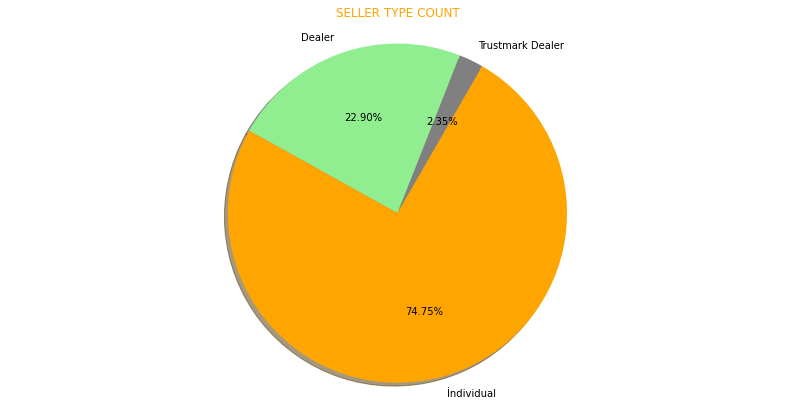

In [20]:
plt.figure(figsize=(14, 7))
labels=["Trustmark Dealer","Dealer","İndividual"]
plt.pie(df['seller_type'].value_counts().sort_values(),labels=labels,explode=[0,0,0],
        autopct='%1.2f%%',colors=['gray','lightgreen',"orange"], startangle=60,shadow=True)
plt.title("SELLER TYPE COUNT",color="orange")
plt.axis('equal')
plt.show()

# This is the pie chart showing where the sales were made. Individual sales are highest.

In [21]:
df.transmission.value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

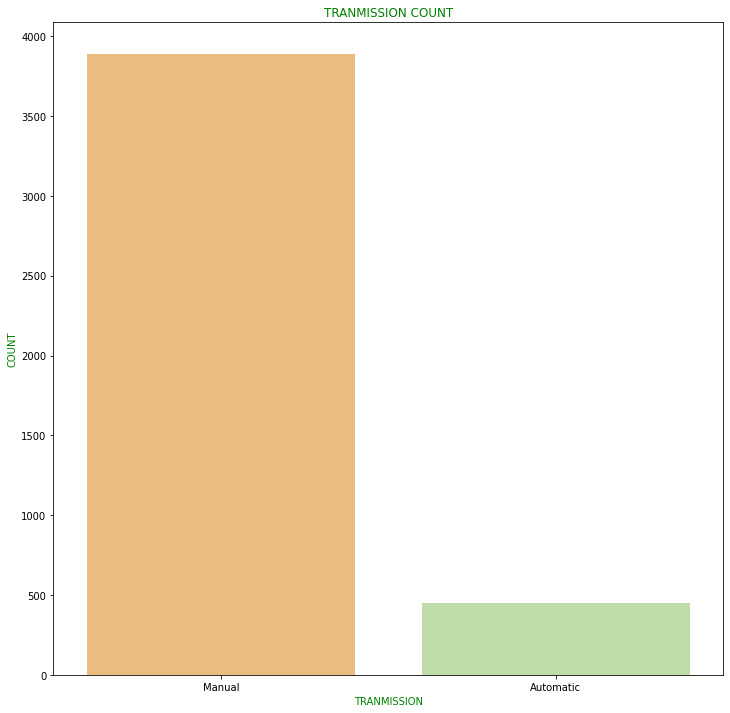

In [22]:
sns.countplot(data=df,x="transmission",palette="Spectral")
plt.xlabel("TRANMISSION",fontsize=10,color="GREEN")
plt.ylabel("COUNT",fontsize=10,color="GREEN")
plt.title("TRANMISSION COUNT",color="GREEN")
plt.show()

# It is the graphic that shows whether the cars are manual or automatic.
# Most are manual cars

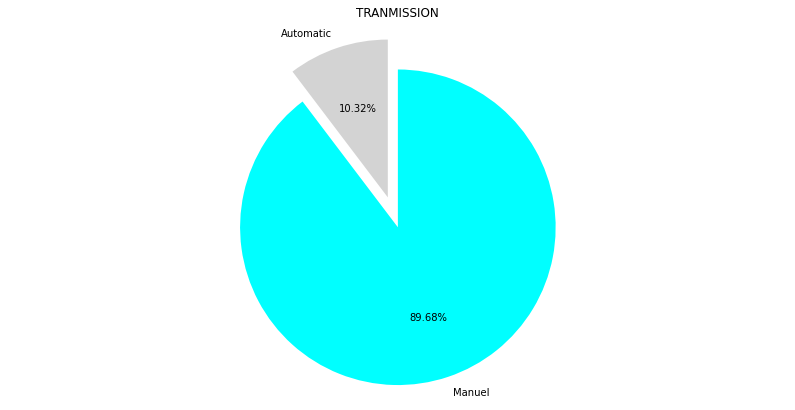

In [23]:
plt.figure(figsize=(14, 7))
labels=['Automatic', 'Manuel']
plt.pie(df['transmission'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['lightgray','cyan'], startangle=90)
plt.title('TRANMISSION')
plt.axis('equal')
plt.show()

# It is the graphic that shows whether the cars are manual or automatic.
# Pie chart showing that most of them are manual cars.

In [24]:
df.owner.value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

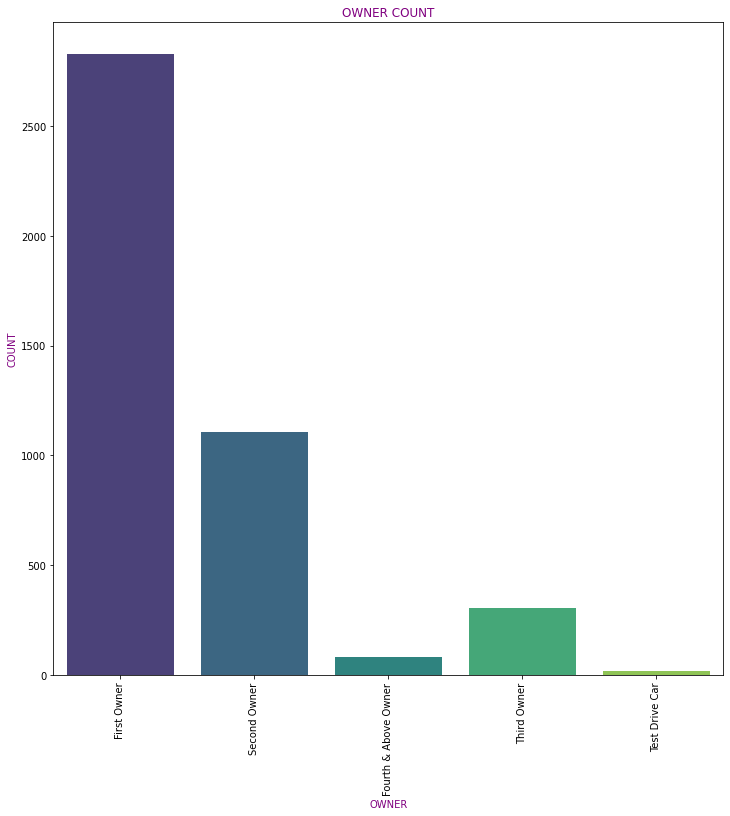

In [25]:
sns.countplot(data=df,x="owner",palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("OWNER",fontsize=10,color="purple")
plt.ylabel("COUNT",fontsize=10,color="purple")
plt.title("OWNER COUNT",color="purple")
plt.show()

# This chart shows us that sellers are selling more first hand.

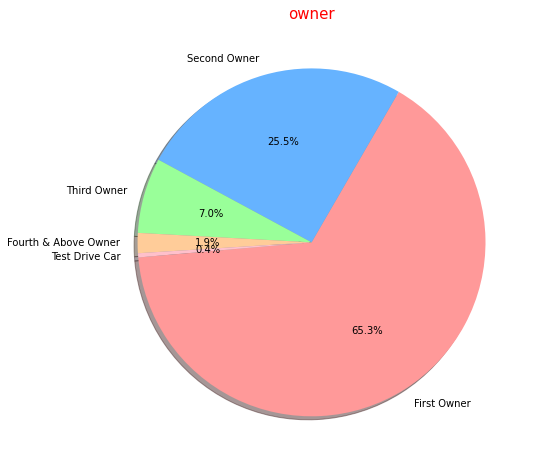

In [26]:
labels = df["owner"].value_counts().index
sizes = df["owner"].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=905)
plt.title('owner',color = 'red',fontsize = 15)
plt.show()

# This pie chart shows us that sellers are selling more first hand.

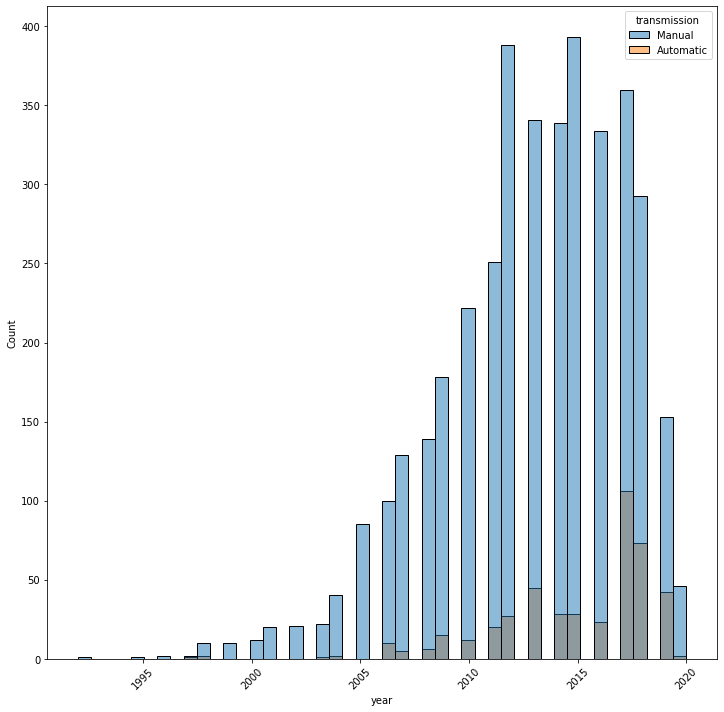

In [27]:
sns.histplot(data=df, x="year", hue="transmission")
plt.xticks(rotation=45)
plt.show()

# It is the histogram graph showing the distribution of manual and automatic cars by years.

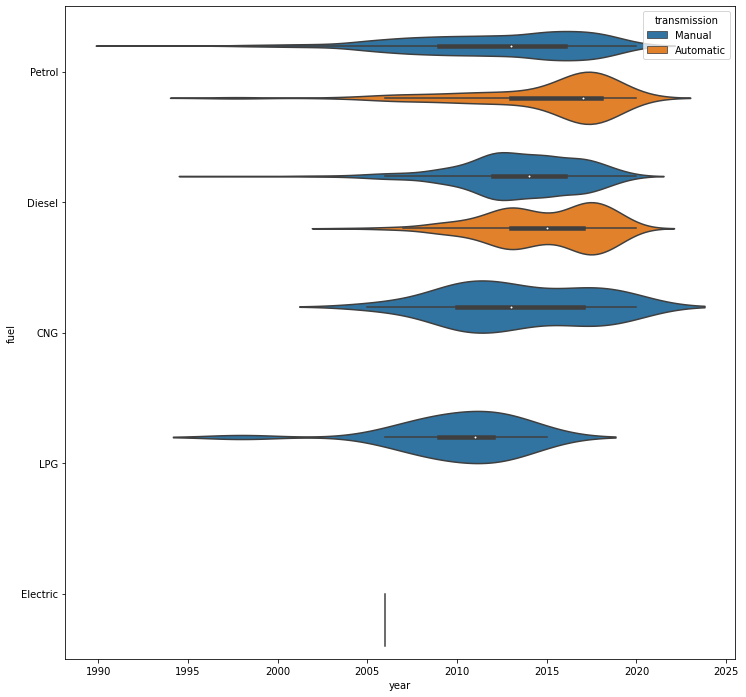

In [28]:
sns.violinplot(data=df, x="year", y="fuel",hue="transmission")
plt.show()

# It is the violin graph showing the distribution of manual and automatic cars by years.

In [29]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,name_2
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [30]:
df1 = df.groupby(["transmission","fuel","name_2"],as_index=False)[['selling_price']].median().rename(columns={'selling_price':'price'})
fig = px.treemap(df1, path = [px.Constant("all"), "transmission","fuel","name_2"], 
                 values   ='price', color='name_2',
                 color_discrete_map={'(?)':'lightgrey', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.update_layout(margin  = dict(t=50, l=25, r=25, b=25))
fig.show()


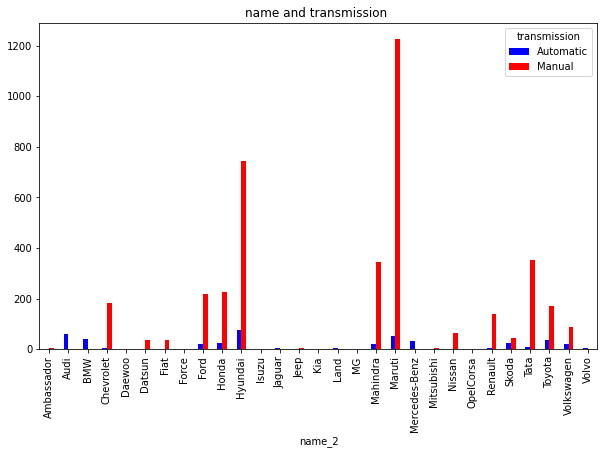

In [31]:
pd.crosstab(df["name_2"], df["transmission"]).plot(kind="bar", figsize=(10, 6), color=["blue","red"], title="name and transmission ")
plt.show()

# This table is a crosstab showing the automatic and manual distribution of car models.

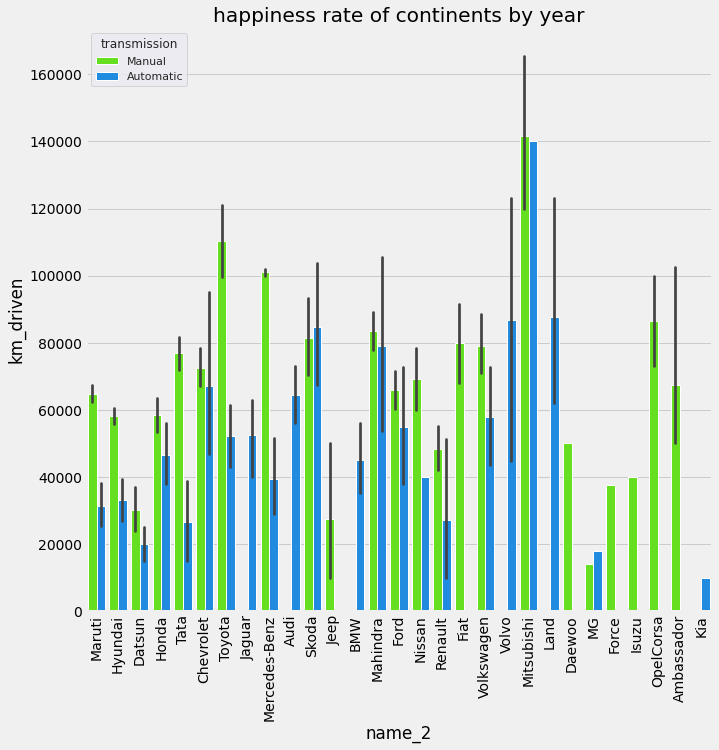

In [32]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,10))
plt.title("happiness rate of continents by year")
sns.set(font_scale=1)
plt.xticks(rotation=90)
sns.barplot(data=df, x="name_2", y="km_driven",hue="transmission",palette="gist_rainbow")
plt.show()

# This table is a barplot chart of mileage of car models.

<AxesSubplot:>

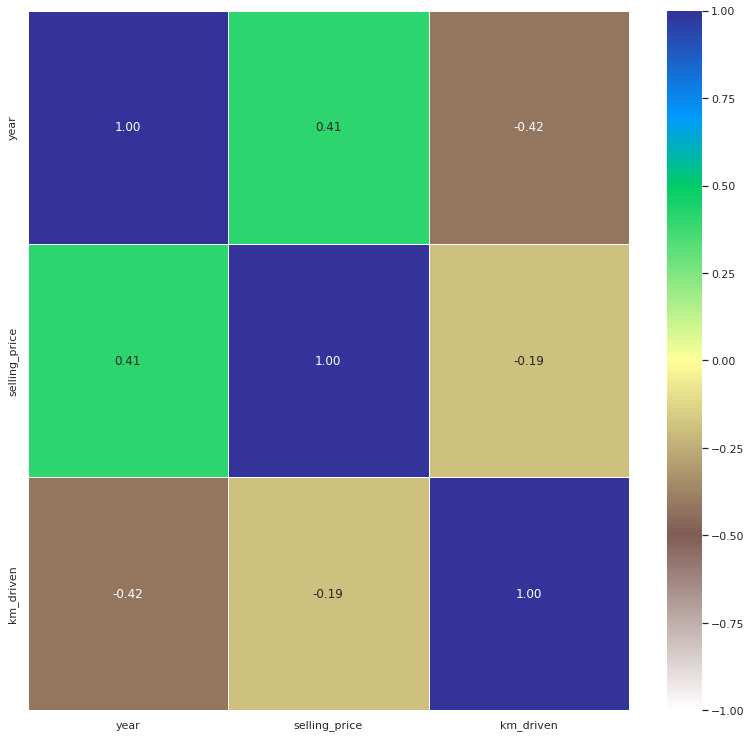

In [33]:
fig, ax = plt.subplots(figsize=(12,12))
corr1   = df.corr()
sns.heatmap(corr1, ax=ax, annot=True, cmap='terrain_r', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

# This table is a correlation graph of numerical values.

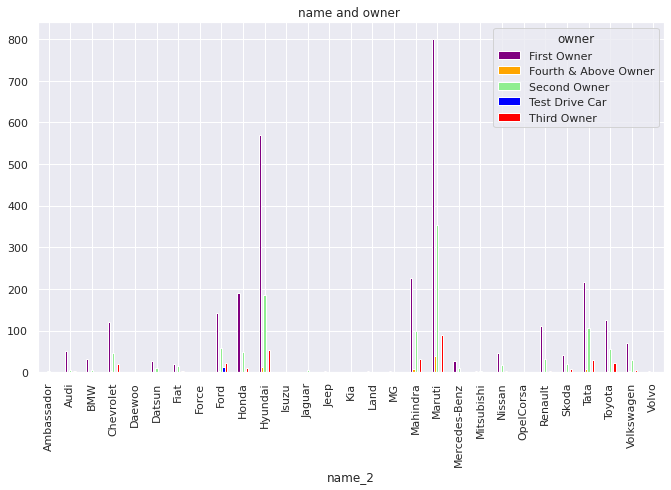

In [34]:
pd.crosstab(df["name_2"], df["owner"]).plot(kind="bar", figsize=(10, 6), color=["purple","orange","lightgreen","blue","red"], title="name and owner ")
plt.show()

# This table is a graph of what car models are called first, second, third, four and above, or test vehicle.

In [35]:
joint_data=df.sort_values(by='year', ascending=False)

top_rated=joint_data[:2500]
fig =px.sunburst(
    top_rated,
    path=['year',"name_2"],
    values='year',
    color='year')
fig.show()

In [36]:
joint_data=df.sort_values(by='year', ascending=False)

top_rated=joint_data[2500:]
fig =px.sunburst(
    top_rated,
    path=['year',"name_2"],
    values='year',
    color='year')
fig.show()

In [37]:
fig = px.strip(df, x='year', y='name_2', color='year')
fig.show()

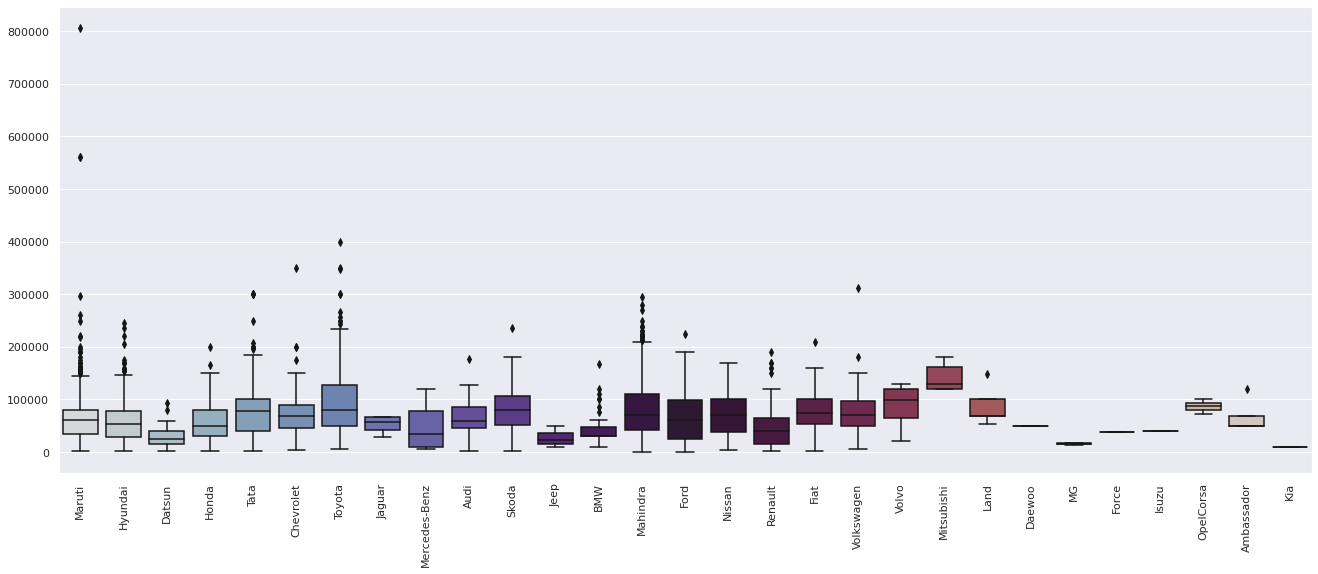

In [38]:
f, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=df["name_2"].values, y = df["km_driven"].values,palette="twilight",ax=ax)
plt.xticks(rotation=90)
plt.show()

# This table is a boxplot by "name_2" and kilometers.